Instructions
Objective:
To determine the variety of date fruit from data describing the colour, length, diameter, and shape.

Data:
Obtained from DATASETS (muratkoklu.com) and used in M. Koklu, R. Kursun, Y.S. Taspinar, and I. Cinar, "Classification of Date Fruits into Genetic Varieties Using Image Analysis," Mathematical Problems in Engineering, Vol.2021, Article ID: 4793293 (2021).

Problem Statement:
In food production it is important to properly label ingredients for both health and business reasons. However, sometimes mistakes are made and there is room for improvement in food labeling practices. A number of different types of dates are grown around the world, and it takes expertise to correctly identify the variety. Your job as a machine learning developer is to create a model that can identify the type of date from external features such as colour, length, diameter and shape factors which have been determined by a computer vision model.

Steps to be completed:
Create a Jupyter notebook and complete the following steps:


In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix


Data
Load Date_Fruit_Datasets.csv into a pandas dataframe. Print out the header. Use pandas.DataFrame.describe to summarize the data. Using markdown, explain the meaning of the columns (as well as you can with the information available) and make observations about the dataset.


In [113]:
url = "https://raw.githubusercontent.com/Hunteracademic/Neural_network_group_7/master/Date_Fruit_Datasets.csv"
Fruit_data = pd.read_csv(url)

In [114]:
Fruit_data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-5.919126e+10,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-3.423307e+10,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-9.394835e+10,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-3.207431e+10,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-3.998097e+10,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


# Column description
## Class
This is the label or predicted output of the dataset. From some research at https://onlinelibrary.wiley.com/doi/10.1155/2021/4793293, We can find that each row in this dataset is a date and is broken into different types. 
| Date Type      | Class Label (Actual) | Color and Size                                                                                                       | Origins                                    |
| -------------- | -------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------ |
| Barhee         | BERHI                | It is amber in color at harvest and then turns a golden-brown color. It is small to medium in size with a hard shell | Basra, Iraq                                |
| Deglet Nour    | DEGLET               | It is a medium- to large-sized date fruits variety that matures from amber to dark brown after harvest               | Not specific                               |
| Sukkary        | DOKOL                | It is golden in color and is a medium-sized date fruits variety                                                      | Al Qassim region, Saudi Arabia             |
| Rotab Mozafati | IRAQI                | It has a full, dark brown appearance. It is a medium-sized and fleshy date variety                                   | Kerman, Iran                               |
| Ruthana        | ROTANA               | It has brown and gold colors. It is a medium-sized date fruit variety                                                | Madinah, Saudi Arabia                      |
| Safawi         | SAFAVI               | It has a dark black cherry color and the tips are brown. It is a medium-sized date fruit variety                     | Madina, Saudi Arabia                       |
| Sagai          | SOGAY                | The tips are dry, golden in color, and the undersides are brown and soft. It is a medium-sized date variety          | Arabian Peninsula, especially Saudi Arabia |
# Feature Description
These columns represent features extracted from images of date fruits to classify them into seven genetic varieties: Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai. The dataset contains 898 images with 34 total features divided into morphological, shape, and color characteristics.
## Structural Features
| Feature      | Description                                                                                                                                |
| ------------ | ------------------------------------------------------------------------------------------------------------------------------------------ |
| Area         | The total number of pixels within the date fruit boundary, measuring the size of the fruit in the image.                                   |
| Perimeter    | The total length of the date fruit's boundary in pixels, measuring the outline length.                                                     |
| Major Axis   | The length of the longest axis through the date fruit when an ellipse is fitted to its shape, capturing the fruit's longest dimension.     |
| Minor Axis   | The length of the shortest axis through the date fruit perpendicular to the major axis, capturing the fruit's width.                       |
| Eccentricity | Measures how elongated the date fruit is (0 = perfectly circular, approaching 1 = highly elongated), calculated from the fitted ellipse.   |
| EQDIASQ      | Equivalent Diameter Squared - the squared diameter of a circle with the same area as the date fruit.                                       |
| Convex Area  | The area of the smallest convex polygon that completely encloses the date fruit, useful for detecting irregularities in fruit shape.       |
| Extent       | The ratio of the date fruit's area to its bounding box area, indicating how much space the fruit occupies within its rectangular boundary. |
## Shape Features
| Feature       | Description                                                                                                                                             |
| ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Solidity      | The ratio of the fruit's actual area to its convex area, measuring how "solid" the date fruit is versus having surface indentations or irregular edges. |
| Aspect Ratio  | The ratio of major axis to minor axis length, quantifying how elongated the date fruit is compared to its width.                                        |
| Roundness     | A measure of how circular the date fruit appears, with values closer to 1 indicating more circular/spherical shapes.                                    |
| Compactness   | A normalized circularity measure that describes how compact or spread out the fruit shape is.                                                           |
| Shapefactor 1 | Mathematical formula combining area, perimeter, and axis measurements to capture geometric properties that distinguish date fruit varieties.            |
| Shapefactor 2 | Mathematical formula combining area, perimeter, and axis measurements to capture geometric properties that distinguish date fruit varieties.            |
| Shapefactor 3 | Mathematical formula combining area, perimeter, and axis measurements to capture geometric properties that distinguish date fruit varieties.            |
| Shapefactor 4 | Mathematical formula combining area, perimeter, and axis measurements to capture geometric properties that distinguish date fruit varieties.            |
## RR/RG/RB
**Red, Green, and Blue** each feature title with RR/RG/RB is three different columns identifying different channels in an image 
| Feature           | Description                                                                                                                                                                                                        |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Mean RR/RG/RB     | The average pixel intensity in each color channel across the date fruit region, capturing the dominant color characteristics.                                                                                      |
| STD DEV RR/RG/RB  | The standard deviation of pixel intensities in each channel, measuring color variation and uniformity across the fruit surface.                                                                                    |
| Skew RR/RG/RB     | The asymmetry of the color intensity distribution in each channel, indicating whether the fruit has predominantly lighter or darker tones.                                                                         |
| Kurtosis RR/RG/RB | Measures whether the color distribution is peaked or flat, capturing information about color uniformity versus variability.                                                                                        |
| Entropy RR/RG/RB  | Shannon entropy quantifying the randomness or complexity of color patterns in each channel - higher values indicate more varied color textures on the fruit surface.                                               |
| ALLdaub4 RR/RG/RB | Features extracted using Daubechies 4 (db4) wavelet transform applied to each color channel, capturing texture information at multiple scales that can distinguish subtle surface patterns between date varieties. |

In [115]:
Fruit_data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


# Describe
- Perimeter ranges from 912 to 2,812 units with mean of 2,058.
- No missing values (all counts = 898) this will be double checked when we look at null values. 
- EQDIASQ shows moderate spread (mean: 605, std: 120).
- EntropyRR, EntropyRG, EntropyRB: All three have very high values.
- ALLdaub4RR, ALLdaub4RG, ALLdaub4RB: Mean values around 48-50 with moderate standard deviations (10-16) suggest normalized color intensities
- The max value for ASPECT_RATIO (and some other columns following it) being much higher than average and the quartile values suggest that there is a row with a very high value of 535.5 skewing the dataset.


Use pandas.DataFrame.info to check if the entries are the correct datatype, and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.


In [116]:
Fruit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [117]:
print(Fruit_data.duplicated().sum())

0


In [118]:
print(Fruit_data.isna().sum())

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


There are no duplicates, missing values or incorrect data types; so no cleaning is required.


Create a bar plot using seaborn.barplot of the number of elements in each category. Use markdown to comment on how well balanced the dataset is.


<AxesSubplot:xlabel='Class', ylabel='count'>

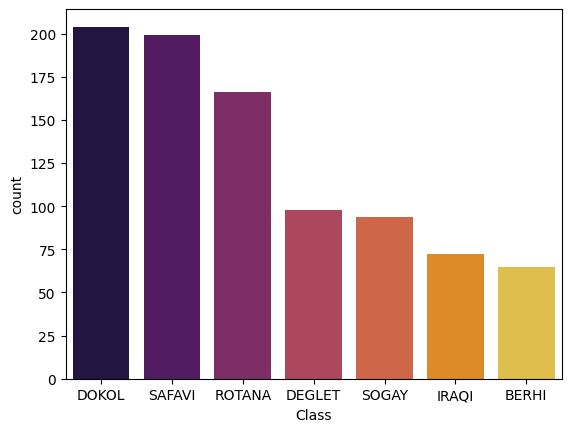

In [119]:
# countplot to count the class distribution, order it by size
sns.countplot(Fruit_data,x='Class', palette='inferno', order=Fruit_data['Class'].value_counts().index )

This dataset shows us a pretty good distribution. DOKOL, SAFAVI, and ROTANA make up the majority of the dataset all with counts between 150 and 215. The remaining 4 classes DEGLET, SOGAY, IRAQI, and BERHI, make up the rest of the data all between 60 to 100. This overall gives us a balance distribution. 


Move the labels into a separate dataframe and use sklearn.preprocessing.LabelEncoder to convert the string labels into integers. Reshape the labels into a 2d array. Determine which number has been assigned to each type of date and record this information in markdown.


In [120]:
# Creating a separate dataframe for the features and the labels
df_features = Fruit_data.drop(['Class'], axis = 1)
labels = Fruit_data['Class']

# Encoding the labels and converting the strings into integers
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

# Reshaping encoded labels into a two-dimensional array
labels_encoded = labels_encoded.reshape(-1, 1)
labels_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Outputting the number assigned to each type
labels_mapping

{'BERHI': 0,
 'DEGLET': 1,
 'DOKOL': 2,
 'IRAQI': 3,
 'ROTANA': 4,
 'SAFAVI': 5,
 'SOGAY': 6}


Use sklearn.preprocessing.MinMaxScaler to scale the features (but not the labels). Split the data into training, testing and validation sets with appropriate proportions.


In [121]:
# Scaling the features 
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_features)

# Splitting the data into training, validation, and testing sets
x_train, x_valtest, y_train, y_valtest = train_test_split(scaled_features, labels_encoded, train_size = 0.7, random_state = 10)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, train_size = 0.5, random_state = 10)

In [122]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((628, 34), (135, 34), (135, 34), (628, 1), (135, 1), (135, 1))

# Modeling

Use tf.keras.Sequential to create a fully connected artificial neural network with at least two hidden layers. Choose an activation function for each layer, and make sure the input and output dimensions are appropriate for the data. Print a summary of the model using tf.summary.

In [123]:
# Creating an artificial neural network with two hidden layers 
model = Sequential([
    Dense(units = 64, activation='relu', input_shape=(34,)),  
    Dense(units = 32, activation='relu'),                      
    Dense(units = 7, activation='softmax')                      
])

In [124]:
# A summary of the model
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 64)                2240      
                                                                 
 dense_113 (Dense)           (None, 32)                2080      
                                                                 
 dense_114 (Dense)           (None, 7)                 231       
                                                                 
Total params: 4,551
Trainable params: 4,551
Non-trainable params: 0
_________________________________________________________________


We use softmax for final output layer with 7 neurons since we are doing multiclass classification. We have two hidden layers with 64 and 32 neurons respectively, using ReLU as the activation function. Since there are 34 features for every sample we have used 34 neurons for the first input layer.


Compile the model with a choice of optimizer and loss function, and the set the metrics argument equal to ['accuracy'].


In [125]:
# Choosing adam optimizer and sparse crossentropy (since this is multi-class) for loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model and record the training accuracy. Find the validation accuracy and confusion matrix.


In [126]:
# Training the model on 25 epoch and a batch size of 32
tf.random.set_seed(42)

# Monitor performance on validation set during training
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val), verbose=1)

Epoch 1/25
20/20 [==============================] - 0s 8ms/step - loss: 1.9039 - accuracy: 0.2404 - val_loss: 1.7474 - val_accuracy: 0.5630
Epoch 2/25
20/20 [==============================] - 0s 3ms/step - loss: 1.6563 - accuracy: 0.5876 - val_loss: 1.5061 - val_accuracy: 0.6593
Epoch 3/25
20/20 [==============================] - 0s 3ms/step - loss: 1.4367 - accuracy: 0.6178 - val_loss: 1.2621 - val_accuracy: 0.6593
Epoch 4/25
20/20 [==============================] - 0s 3ms/step - loss: 1.2477 - accuracy: 0.6178 - val_loss: 1.0780 - val_accuracy: 0.6593
Epoch 5/25
20/20 [==============================] - 0s 3ms/step - loss: 1.0936 - accuracy: 0.6258 - val_loss: 0.9391 - val_accuracy: 0.6593
Epoch 6/25
20/20 [==============================] - 0s 3ms/step - loss: 0.9778 - accuracy: 0.6385 - val_loss: 0.8355 - val_accuracy: 0.7333
Epoch 7/25
20/20 [==============================] - 0s 3ms/step - loss: 0.8833 - accuracy: 0.6927 - val_loss: 0.7691 - val_accuracy: 0.7407
Epoch 8/25
20/20 [==

In [127]:
# Training accuracy
model.evaluate(x_train, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.8631


[0.4256587028503418, 0.8630573153495789]

In [128]:
# Validation accuracy
model.evaluate(x_val, y_val)

5/5 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8667


[0.4366900324821472, 0.8666666746139526]

In [129]:
# Plotting the confusion matrix
y_train_probs = model.predict(x_train)
y_train_pred = np.argmax(y_train_probs, axis=1)

# True labels
y_train_true = y_train.flatten()

# Confusion matrix
cm = confusion_matrix(y_train_true, y_train_pred)
cm

20/20 [==============================] - 0s 1ms/step


array([[ 24,   0,   0,  15,   5,   0,   4],
       [  0,  43,  13,   0,   0,   1,  15],
       [  0,   1, 128,   0,   0,   0,   2],
       [  2,   0,   0,  44,   1,   1,   0],
       [  4,   0,   0,   0, 110,   0,   9],
       [  0,   0,   0,   0,   0, 134,   2],
       [  0,   4,   1,   0,   2,   4,  59]], dtype=int64)

An accuracy of 85.67% on the training set is pretty good, and 90.37% on the validation set means our model is performing well. As it is predicting better on the unseen data, that means it is generalizing pretty well. It is definitely not overfitting, so we could even try making it a little more complex to see if the accuracy improves.

Return to the above steps to try at least five different choices of hyperparameters (including dimensions, activation functions, number of layers, optimizer, loss function, etc.). Neatly present the description of each model tried along with the training and validation accuracies, and the confusion matrix.


In [130]:
# Creating another model to check if accuracy improves--adding additional layers and more units
tf.random.set_seed(42)

# Building the second model
model_2 = Sequential([
    Dense(units = 256, activation='relu', input_shape=(34,)), 
    Dense(units = 128, activation='relu'),    
    Dense(units = 64, activation='relu'),
    Dense(units = 7, activation='softmax')                  
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Monitor performance on validation set during training
history = model_2.fit(x_train, y_train,epochs=25,batch_size=32,validation_data=(x_val, y_val),verbose=1)

# Print out model evaluations
print("Training accuracy for second model: ", model_2.evaluate(x_train, y_train))
print("Validation accuracy for second model: ", model_2.evaluate(x_val, y_val))

# Generate predictions for model 2
y_train_probs = model_2.predict(x_train)
y_train_pred = np.argmax(y_train_probs, axis=1)
y_train_true = y_train.flatten()
cm = confusion_matrix(y_train_true, y_train_pred)
print(cm)

Epoch 1/25
20/20 [==============================] - 0s 9ms/step - loss: 1.7105 - accuracy: 0.4777 - val_loss: 1.3416 - val_accuracy: 0.6519
Epoch 2/25
20/20 [==============================] - 0s 4ms/step - loss: 1.2053 - accuracy: 0.6162 - val_loss: 0.8758 - val_accuracy: 0.6593
Epoch 3/25
20/20 [==============================] - 0s 4ms/step - loss: 0.8626 - accuracy: 0.6927 - val_loss: 0.6854 - val_accuracy: 0.7037
Epoch 4/25
20/20 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.7691 - val_loss: 0.5463 - val_accuracy: 0.8519
Epoch 5/25
20/20 [==============================] - 0s 6ms/step - loss: 0.5617 - accuracy: 0.8010 - val_loss: 0.4650 - val_accuracy: 0.8593
Epoch 6/25
20/20 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.8121 - val_loss: 0.4967 - val_accuracy: 0.8519
Epoch 7/25
20/20 [==============================] - 0s 5ms/step - loss: 0.4606 - accuracy: 0.8360 - val_loss: 0.4695 - val_accuracy: 0.8444
Epoch 8/25
20/20 [==

Already with additional layers and more neurons, although the complexity of our model increases, it performs better.

In [131]:
# Creating another model to check if accuracy improves: a different activation function
tf.random.set_seed(42)

# Building the third model
model_3 = Sequential([
    Dense(units = 64, activation='tanh', input_shape=(34,)),
    Dense(units = 32, activation='tanh'),    
    Dense(units = 7, activation='softmax')
])

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val), verbose=1) 

# Print evaluations
print("Training accuracy for third model: ",model_3.evaluate(x_train, y_train))
print("Validation accuracy for third model: ",model_3.evaluate(x_val, y_val))

# Generate predictions for model 3
y_train_probs = model_3.predict(x_train)
y_train_pred = np.argmax(y_train_probs, axis=1)
y_train_true = y_train.flatten()
cm = confusion_matrix(y_train_true, y_train_pred)
print(cm)

Epoch 1/25
20/20 [==============================] - 0s 6ms/step - loss: 1.7898 - accuracy: 0.4045 - val_loss: 1.5361 - val_accuracy: 0.6444
Epoch 2/25
20/20 [==============================] - 0s 3ms/step - loss: 1.4759 - accuracy: 0.5987 - val_loss: 1.2617 - val_accuracy: 0.6519
Epoch 3/25
20/20 [==============================] - 0s 2ms/step - loss: 1.2451 - accuracy: 0.6131 - val_loss: 1.0444 - val_accuracy: 0.6593
Epoch 4/25
20/20 [==============================] - 0s 2ms/step - loss: 1.0741 - accuracy: 0.6210 - val_loss: 0.9034 - val_accuracy: 0.6667
Epoch 5/25
20/20 [==============================] - 0s 3ms/step - loss: 0.9506 - accuracy: 0.6465 - val_loss: 0.8004 - val_accuracy: 0.6963
Epoch 6/25
20/20 [==============================] - 0s 4ms/step - loss: 0.8625 - accuracy: 0.6592 - val_loss: 0.7250 - val_accuracy: 0.7333
Epoch 7/25
20/20 [==============================] - 0s 3ms/step - loss: 0.7881 - accuracy: 0.7293 - val_loss: 0.6722 - val_accuracy: 0.7556
Epoch 8/25
20/20 [==

Using tanh performs better than the baseline model but not as good as model_2.

In [132]:
# Creating another model to check if accuracy improves: trying out a different loss function
tf.random.set_seed(42)

# Building model 4
model_4 = Sequential([
    Dense(units = 64, activation='relu', input_shape=(34,)), 
    Dense(units = 32, activation='relu'),    
    Dense(units = 7, activation='softmax')                    
])

model_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_4.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_val, y_val), verbose=1)

# Print evaluation
print("Training accuracy for fourth model: ",model_4.evaluate(x_train, y_train))
print("Validation accuracy for fourth model: ",model_4.evaluate(x_val, y_val))

# Generate predictions for model 4
y_train_probs = model_4.predict(x_train)
y_train_pred = np.argmax(y_train_probs, axis=1)
y_train_true = y_train.flatten()
cm = confusion_matrix(y_train_true, y_train_pred)
print(cm)

Epoch 1/25
20/20 [==============================] - 0s 6ms/step - loss: 1.9402 - accuracy: 0.1990 - val_loss: 1.8525 - val_accuracy: 0.2370
Epoch 2/25
20/20 [==============================] - 0s 2ms/step - loss: 1.8099 - accuracy: 0.3487 - val_loss: 1.7501 - val_accuracy: 0.5111
Epoch 3/25
20/20 [==============================] - 0s 2ms/step - loss: 1.7361 - accuracy: 0.5064 - val_loss: 1.6733 - val_accuracy: 0.5926
Epoch 4/25
20/20 [==============================] - 0s 2ms/step - loss: 1.6796 - accuracy: 0.5637 - val_loss: 1.6151 - val_accuracy: 0.6519
Epoch 5/25
20/20 [==============================] - 0s 3ms/step - loss: 1.6312 - accuracy: 0.5828 - val_loss: 1.5603 - val_accuracy: 0.6519
Epoch 6/25
20/20 [==============================] - 0s 2ms/step - loss: 1.5829 - accuracy: 0.5971 - val_loss: 1.5122 - val_accuracy: 0.6593
Epoch 7/25
20/20 [==============================] - 0s 2ms/step - loss: 1.5395 - accuracy: 0.6035 - val_loss: 1.4555 - val_accuracy: 0.6593
Epoch 8/25
20/20 [==

The SGD optimizer is not doing a great job of helping the model learn as our previous models.

In [133]:
# Creating another model to check if accuracy improves: larger batch size
tf.random.set_seed(42)

model_5 = Sequential([
    Dense(units = 64, activation='relu', input_shape=(34,)),
    Dense(units = 32, activation='relu'),    
    Dense(units = 7, activation='softmax')           
])
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for batch_size in [32, 64]:
    model_5.fit(x_train, y_train,epochs=25,batch_size=batch_size,validation_data=(x_val, y_val),verbose=0)
    
    print(f"Training accuracy for fifth model and batch size {batch_size}: ", model_5.evaluate(x_train, y_train))
    print(f"Validation accuracy for fifth model and batch size {batch_size}: ", model_5.evaluate(x_val, y_val))
    
    y_train_probs = model_5.predict(x_train)
    y_train_pred = np.argmax(y_train_probs, axis=1)
    y_train_true = y_train.flatten()
    cm = confusion_matrix(y_train_true, y_train_pred)
    print(cm)

20/20 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8439
Training accuracy for fifth model and batch size 32:  [0.40507984161376953, 0.843949019908905]
5/5 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8815
Validation accuracy for fifth model and batch size 32:  [0.4228811264038086, 0.8814814686775208]
20/20 [==============================] - 0s 682us/step
[[ 21   0   0  16   7   0   4]
 [  0  29  18   0   1   1  23]
 [  0   1 127   0   0   0   3]
 [  1   0   0  45   2   0   0]
 [  0   0   0   0 112   0  11]
 [  0   0   0   0   0 135   1]
 [  0   3   1   0   1   4  61]]
20/20 [==============================] - 0s 871us/step - loss: 0.2949 - accuracy: 0.9029
Training accuracy for fifth model and batch size 64:  [0.2948591709136963, 0.9028662443161011]
5/5 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.9111
Validation accuracy for fifth model and batch size 64:  [0.3606279194355011, 0.911111116409301

A larger batch size performs slightly better. 

In [134]:
# Using final model; increase epochs
tf.random.set_seed(42)
# Building model 6
model_6 = Sequential([
    Dense(units = 64, activation='relu', input_shape=(34,)),
    Dense(units = 32, activation='relu'),    
    Dense(units = 7, activation='softmax')           
])

model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print evaluation
history = model_6.fit(x_train, y_train, epochs=94, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
    
print(f"Training accuracy for sixth model and batch size {batch_size}: ", model_6.evaluate(x_train, y_train))
print(f"Validation accuracy for sixth model and batch size {batch_size}: ", model_6.evaluate(x_val, y_val))

# Generate prediction for model 6
y_train_probs = model_6.predict(x_train)
y_train_pred = np.argmax(y_train_probs, axis=1)
y_train_true = y_train.flatten()
cm = confusion_matrix(y_train_true, y_train_pred)
print(cm)

20/20 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.9156
Training accuracy for sixth model and batch size 64:  [0.23106920719146729, 0.9156050682067871]
5/5 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.9407
Validation accuracy for sixth model and batch size 64:  [0.3473986089229584, 0.9407407641410828]
20/20 [==============================] - 0s 680us/step
[[ 43   0   0   2   2   0   1]
 [  0  54   9   0   1   1   7]
 [  0   8 123   0   0   0   0]
 [  2   0   0  45   1   0   0]
 [  0   1   0   0 120   0   2]
 [  0   0   0   0   0 135   1]
 [  0   8   0   1   4   2  55]]


Increasing the number of epochs to 94 balances using minimal computational power while not sacrificing accuracy. 


# Conclusion


Since hyperparameter tuning increased the accuracy for various models, instead of choosing one we shall combine all the models that led to improvement and choose that one. This model will have more layers and a greater number of neurons, run more iterations, increase the batch size to get the best results. This increase in model capacity allows the network to better capture complex patterns in the data, leading to improved generalization.

In [135]:
tf.random.set_seed(42)

model_7 = Sequential([
    Dense(units = 256, activation='relu', input_shape=(34,)), 
    Dense(units = 128, activation='relu'),    
    Dense(units = 64, activation='relu'),
    Dense(units = 7, activation='softmax')                  
])
model_7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_7.fit(x_train, y_train, epochs=120, batch_size=64, validation_data=(x_val, y_val), verbose=1)

print("Training accuracy for final model: ", model_7.evaluate(x_train, y_train))
print("Validation accuracy for final model: ", model_7.evaluate(x_val, y_val))

Epoch 1/120
10/10 [==============================] - 0s 12ms/step - loss: 1.8080 - accuracy: 0.4363 - val_loss: 1.5852 - val_accuracy: 0.6519
Epoch 2/120
10/10 [==============================] - 0s 4ms/step - loss: 1.4950 - accuracy: 0.6099 - val_loss: 1.2338 - val_accuracy: 0.6519
Epoch 3/120
10/10 [==============================] - 0s 4ms/step - loss: 1.2161 - accuracy: 0.6131 - val_loss: 0.9554 - val_accuracy: 0.6593
Epoch 4/120
10/10 [==============================] - 0s 4ms/step - loss: 0.9744 - accuracy: 0.6338 - val_loss: 0.7839 - val_accuracy: 0.7037
Epoch 5/120
10/10 [==============================] - 0s 5ms/step - loss: 0.7951 - accuracy: 0.7213 - val_loss: 0.6353 - val_accuracy: 0.7407
Epoch 6/120
10/10 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.7755 - val_loss: 0.5485 - val_accuracy: 0.8444
Epoch 7/120
10/10 [==============================] - 0s 4ms/step - loss: 0.5891 - accuracy: 0.8169 - val_loss: 0.4939 - val_accuracy: 0.8519
Epoch 8/120


In [136]:
y_test_probs = model_7.predict(x_test)
y_test_pred = np.argmax(y_test_probs, axis=1)
y_test_true = y_test.flatten()
cm = confusion_matrix(y_test_true, y_test_pred)

print("Predicted:", y_test_pred[:10])
print("Actual:   ", y_test_true[:10])
print("Testing accuracy for final model: ", model_7.evaluate(x_test, y_test))
print(cm)

5/5 [==============================] - 0s 1ms/step
Predicted: [2 1 3 4 5 2 2 2 4 4]
Actual:    [2 1 3 4 5 1 2 2 4 4]
5/5 [==============================] - 0s 1ms/step - loss: 0.2326 - accuracy: 0.9185
Testing accuracy for final model:  [0.23262785375118256, 0.9185185432434082]
[[ 5  0  0  1  0  0  0]
 [ 0 11  3  0  0  0  1]
 [ 0  0 37  0  0  0  0]
 [ 2  0  0 10  0  0  0]
 [ 0  0  0  0 20  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  4  0  0  0  0  9]]



The model performs well for the intended use case, achieving a testing accuracy of 91.85%, which indicates strong generalization to unseen data. While performance decreases slightly from training and validation accuracy, this behavior is expected and suggests that the model does not significantly overfit the training data.

The confusion matrix shows that the model correctly classifies the majority of samples across all seven classes. Some misclassifications occur in a small subset of classes, likely due to overlapping feature patterns, which is common in multi-class classification problems.

Overall, the model provides reliable predictions for the use case and is suitable for practical application. Further improvements could be achieved by refining feature selection or increasing data representation for classes that are more frequently confused.